# Phase 1

Phase 1 takes us to a url with pictures

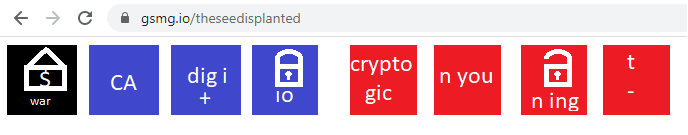

There isn't an obvious next step, so we have to dig a bit deeper. Since we're on a url, let's have a look at the source for the website:


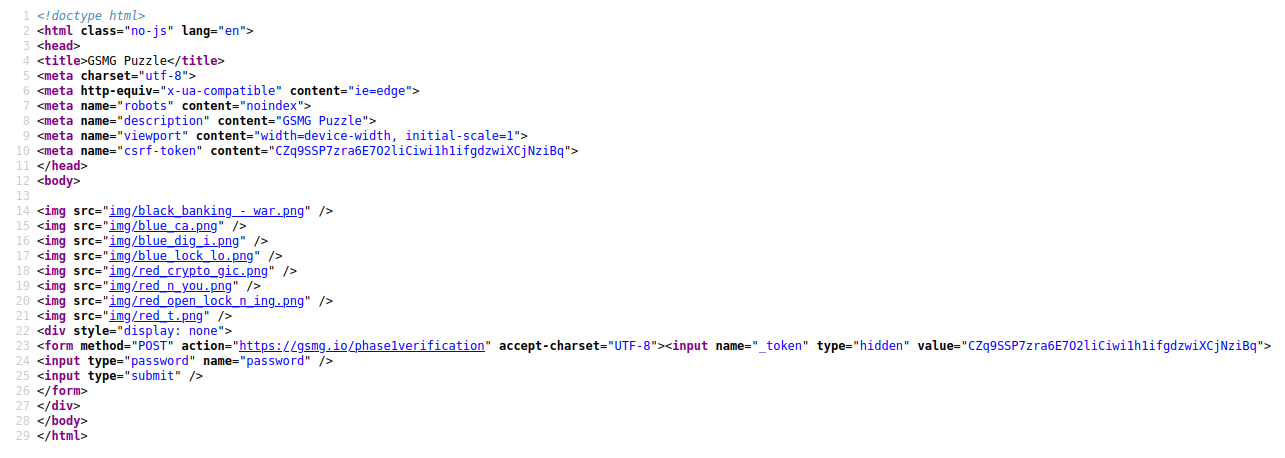

As we can see from the source, there is a hidden form that's expecting a "password". 

We can rearrange the pictures to form some words:
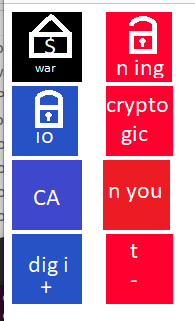

```
"warning"
"crypto"
"logic"
"can you"
"dig it"
"+ -"
```

If we google those phrases we don't get much, but if we remove "crypto" the search results become more interesting (or perhaps you were already familiar with the song "The Warning" by _Logic_).

Now, if we look at [the lyrics](https://www.rockol.com/uk/lyrics-61092449/logic-the-warning-inner-mix?refresh_ce) for the song:

> Phase one
> 
> **The seed is planted** when opposites attract
>
> Can you dig it?
>
> It takes the physical to create the physical
> 
> Phase two
> 
> The flower blossoms through what seems to be a concrete surface
>
> I.e. greed, racism, insanity, physical and social handicaps
>
> These are the things that mob the flower
>
> Red rose or black rose; no in-between
>
> Phase 3
>
> The Judgement
> 
> If it were to fall upon you today, which flower would you be?
>
> The red rose or the black?
>
> This is the warning 

We see the url burried in the first line of the song, and some of the lyrics are part of the the images.

At this point we have to consider what it is that could be considered a password? Is it the lyrics, is it the meaning of the lyrics, or something else. 

Let's test a few things



In [1]:
import requests
import time
import re

url = f"https://gsmg.io/phase1verification"

# here is our "check password function"
# it pretends to be the form and submits a password 
# it then looks at the output to see if either we go to
# another page, or get different output
def check_password(s):
    data = {
        'password': s
    }
    # let's not hammer the site too much
    tries = 0
    while tries < 10:
        try:
            resp = requests.post(url, data, allow_redirects=False)
        except (requests.ConnectionError):
            # give the server a break, and try again
            time.sleep(5)
        else:
            if resp.status_code == 520:
                # cloudflare error
                time.sleep(5)
            else:
                break
    if tries >= 10:
        raise Exception("too many tries")
    
    resp.raise_for_status()
    if resp.status_code == 302:
        # we want to know if we went to a different page
        if resp.headers['Location'] != "http://gsmg.io/theseedisplanted":
            print(f"FOUND REDIRECT (password: {s})", resp.headers['Location'])
            return True
    # if the site breaks
    elif 'Oops...' in resp:
        return False
    elif 'img/black_banking' not in resp.content:
        # the page changed
        return True
    else:
        # we came back to the same page, we need to try again
        return False
    
# Since we don't know the format of the password, we will want to try 
# variations

# not alphanumeric
an_rx = re.compile(r'[^0-9a-zA-Z]+')
# whitespace
ws_rx = re.compile(r'\s+')
# not alphanumeric nor space
ans_rx = re.compile(r'[^0-9a-zA-Z ]+')

def alphanum_only(s):
    return an_rx.sub("", s)
def remove_ws(s):
    return ws_rx.sub("", s).strip()
def alphanum_sp_only(s):
    return ans_rx.sub("", s).strip()

# lets create some variations to try
def variations(s):
    for a in [s, alphanum_only(s), alphanum_sp_only(s)]:
        for b in [a, a.lower(), a.upper()]:
            for c in [b, remove_ws(b)]:
                yield c

# this is where we keep our password ideas
IDEAS=[
    # start with one string per lyric line
    "The warning",
    "Phase one",
    "The seed is planted when opposites attract",
    "Can you dig it?",
    "It takes the physical to create the physical",
    "Phase two",
    "The flower blossoms through what seems to be a concrete surface",
    "I.e. greed, racism, insanity, physical and social handicaps",
    "These are the things that mob the flower",
    "Red rose or black rose; no in-between",
    "Phase 3",
    "The Judgement",
    "If it were to fall upon you today, which flower would you be?",
    "The red rose or the black?",
    "This is the warning",
]

def main():
    # check each variation of each idea
    for idea in IDEAS:
        for password in variations(idea):
            if check_password(password):
                return
main()

FOUND REDIRECT (password: theflowerblossomsthroughwhatseemstobeaconcretesurface) http://gsmg.io/choiceisanillusioncreatedbetweenthosewithpowerandthosewithoutaveryspecialdessertiwroteitmyself


As you can see `theflowerblossomsthroughwhatseemstobeaconcretesurface` is the password, that leads us to [phase 2](http://gsmg.io/choiceisanillusioncreatedbetweenthosewithpowerandthosewithoutaveryspecialdessertiwroteitmyself
)

# Conclusions
Some things we learn from this phase:
* sometimes the hints need to be googled to reveal what they mean
* passwords and urls are lower case with no spaces between


Go to [Walkthrough for phase 2](/phase2.ipynb)